# Importing Libraries

In [1]:
import pandas as pd

#Linear Algebra
import numpy as np

#Data Visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style


# Algorithms
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Getting Data

In [2]:
heart=pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart.shape

(1025, 14)

here we can observe that 1025 rows and 14 columns present in this dataset.

# DataPreprocessing 

In [4]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Minimum age of person is 29 years and maximum age of person is 77 .

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


other than oldpeak everything is in integer format.

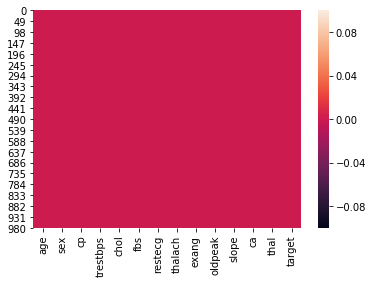

In [6]:
#check weather null data is present or not
sns.heatmap(heart.isnull())

It's clear that there is no null data present in this dataset.

In [7]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

# Exploratory Data Analysis

## What's the total count of males and females ?

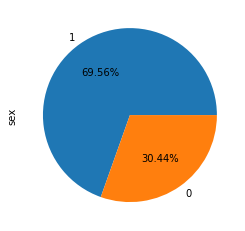

In [8]:
heart['sex'].value_counts().plot.pie(autopct="%2.2f%%")

0 is Female and 1 is Male  it's clear that there most of them are Males compare to females.

## Which age persons mostly facing heart related issues ?

Text(0.5, 1.0, 'Distribution of Age')

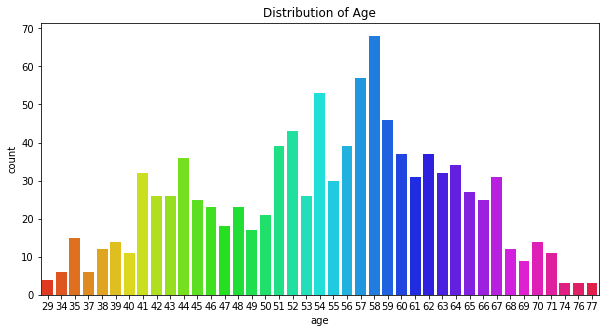

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(heart['age'],palette='hsv')
plt.title("Distribution of Age")

# Observations:

From above you may see that mostly whose age is in between 57-59 they are facing heart related healt issues.And whose age is in between76-77 and 29 they are in very rare cases facing heart related health problems.

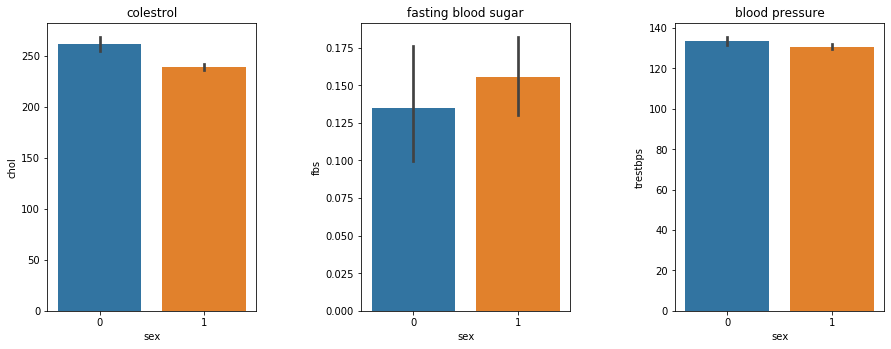

In [10]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('colestrol')
sns.barplot(x="sex", y="chol", data=heart)
plt.subplot(132)
plt.title('fasting blood sugar')
sns.barplot(x="sex", y="fbs", data=heart)
plt.subplot(133)
plt.title('blood pressure')
sns.barplot(x="sex", y="trestbps", data=heart)


from here we can observe that for males cholestrol rate is high and blood sugar is more for females compare to males .And blood pressure for males is high compare to females.

## Which type of chest pain most of the peoples are facing?

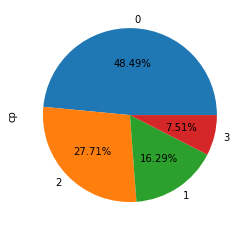

In [11]:
heart['cp'].value_counts().plot.pie(autopct="%2.2f%%")

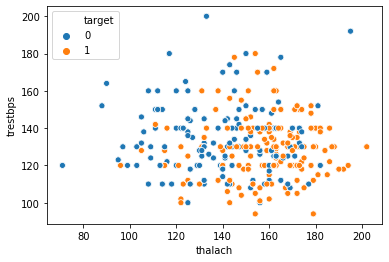

In [12]:
sns.scatterplot(x='thalach',y='trestbps',hue='target',data =heart)

whose blood pressure is in between 120-140 and heart rate is in between 140-180 they are mostly facing heart related issues.

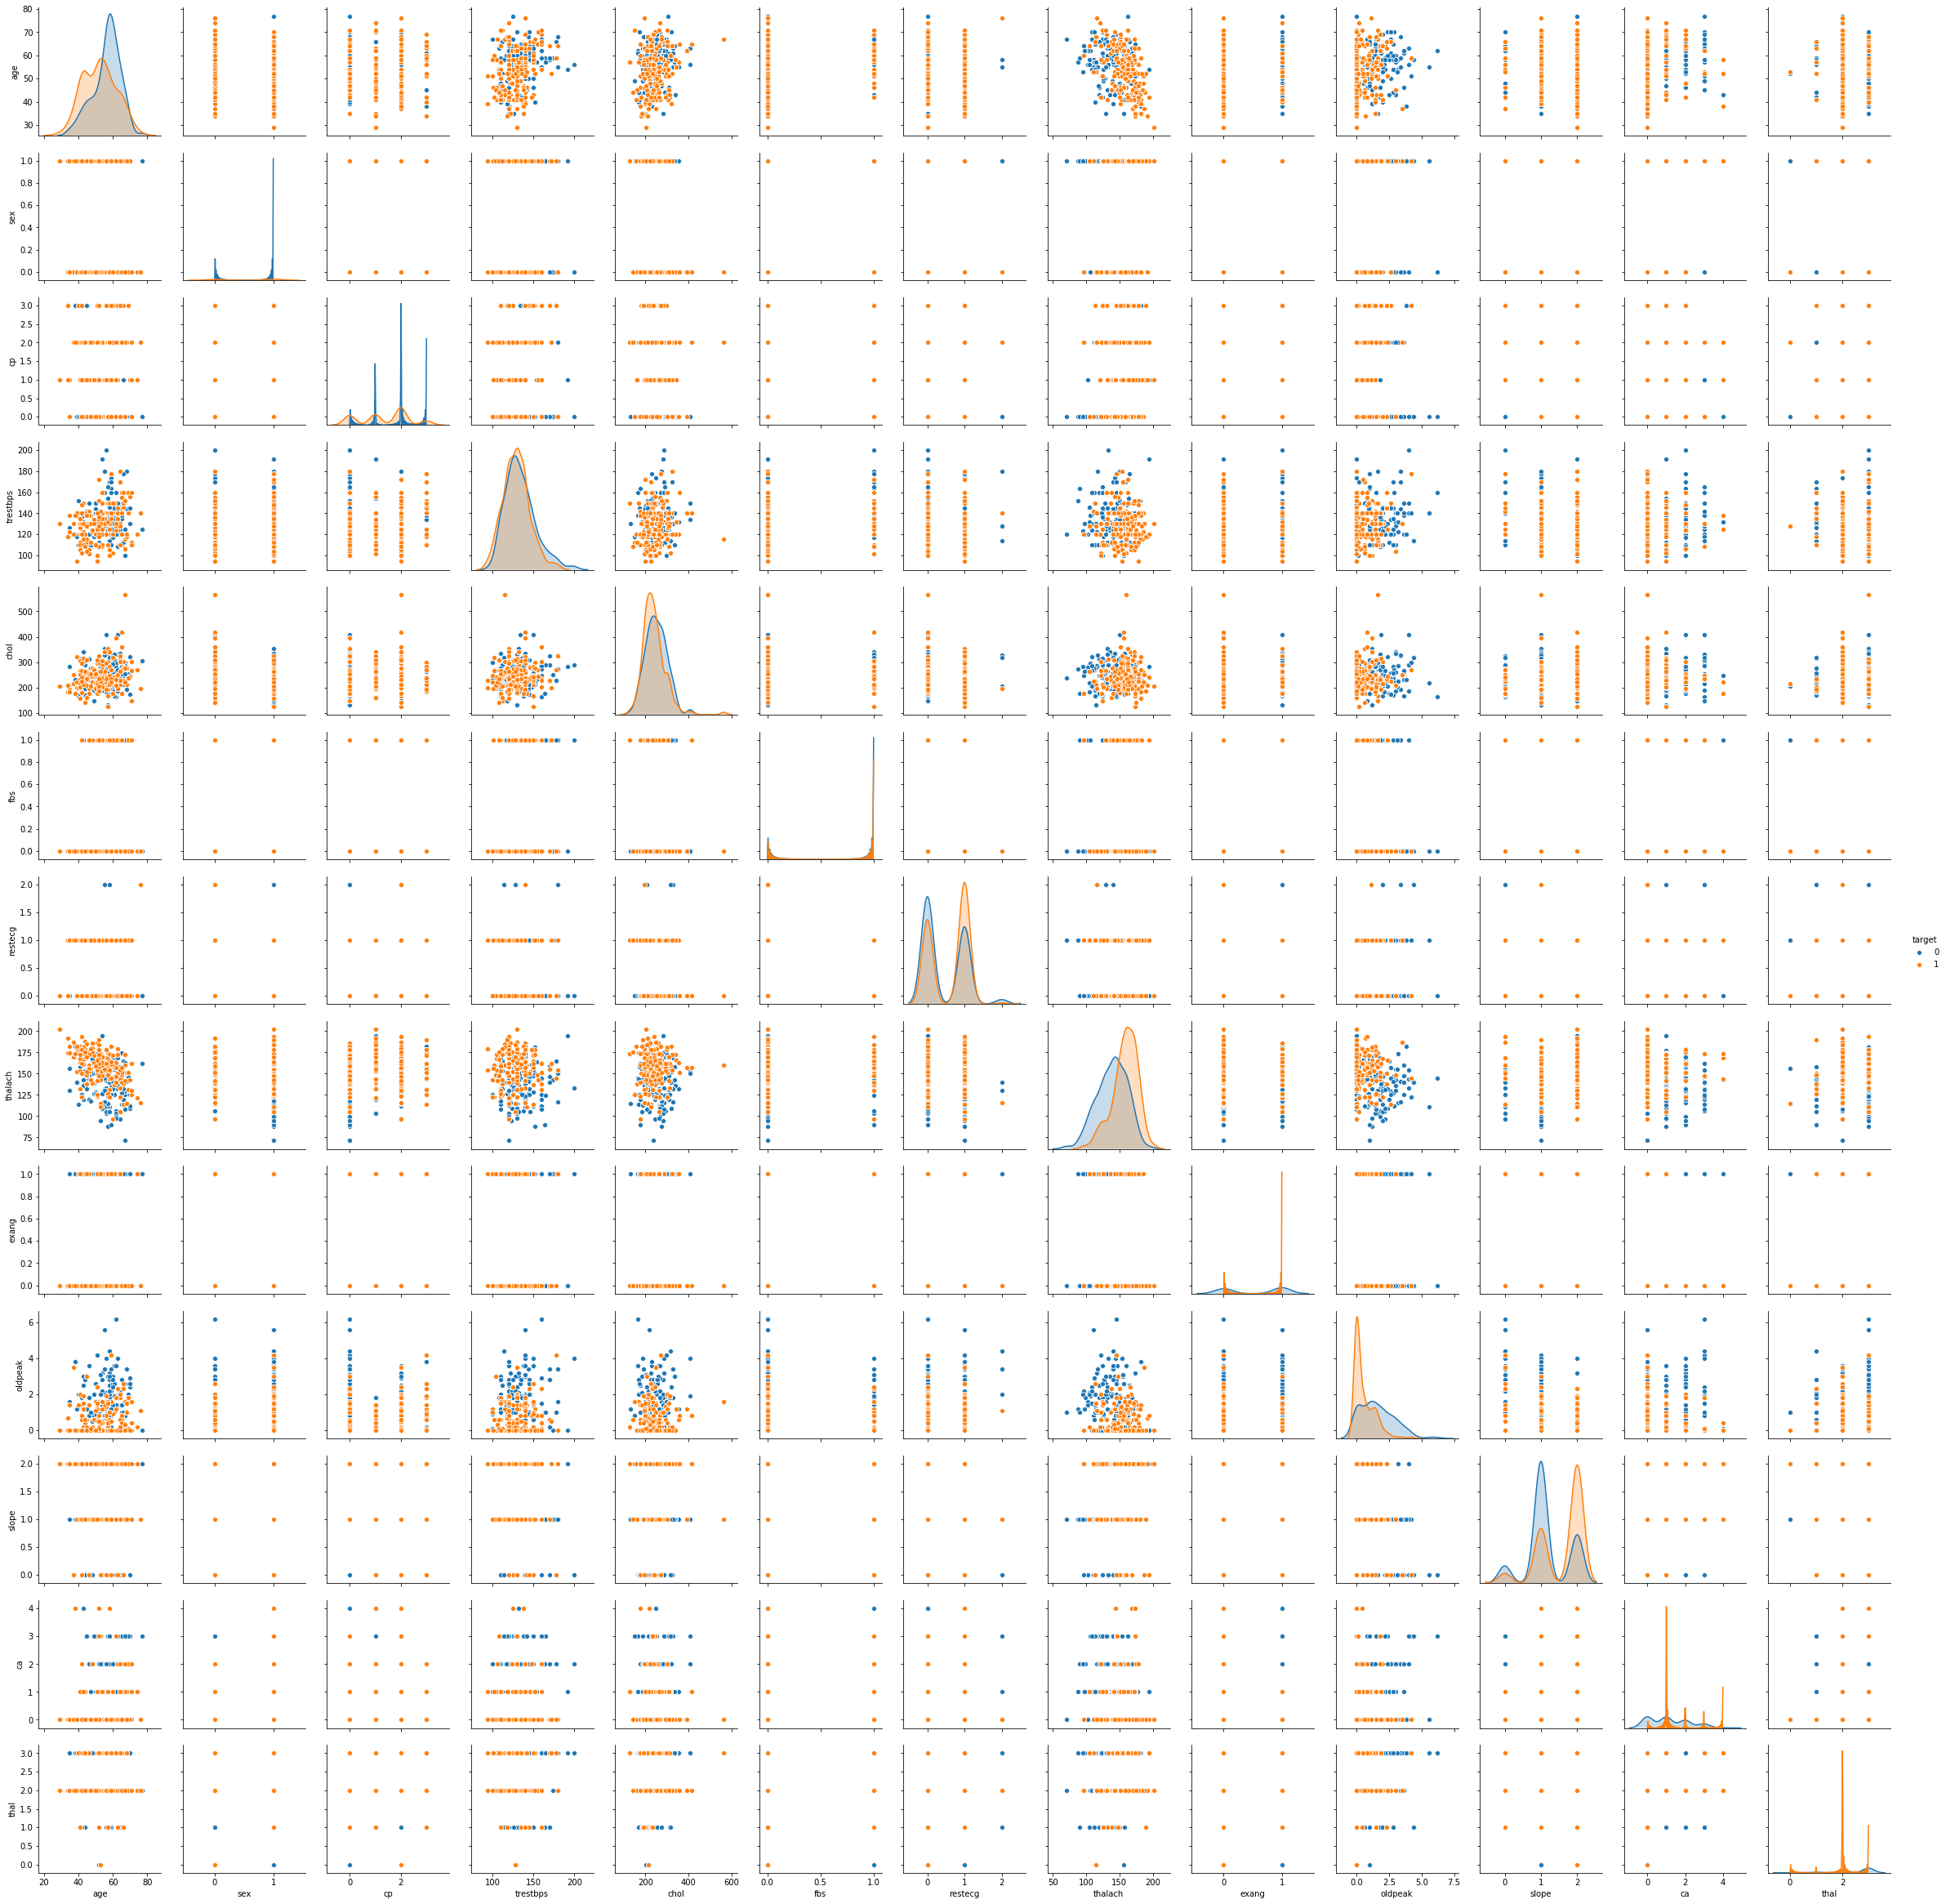

In [13]:
sns.pairplot(heart ,hue ='target', vars =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

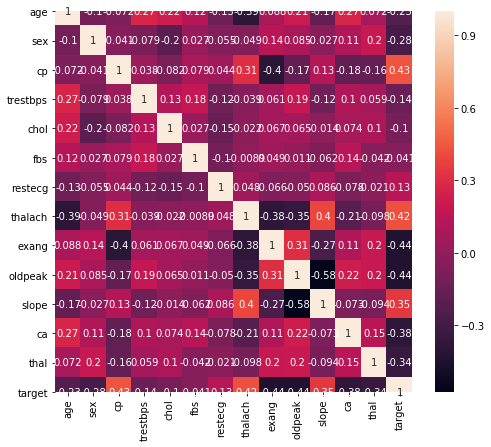

In [14]:
#check cor-relation
corr_hmap=heart.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

cp is highly cor-relate with thalach and exang is highly negatively cor-relate with target ,talach,cp features.

# Detecting and Removing Outliers

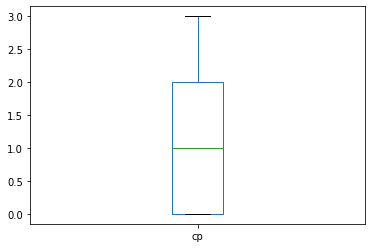

In [15]:
heart['cp'].plot.box()

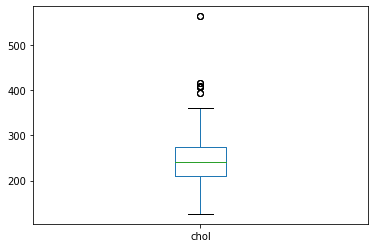

In [16]:
heart['chol'].plot.box()

age            AxesSubplot(0.125,0.536818;0.065678x0.343182)
sex         AxesSubplot(0.203814,0.536818;0.065678x0.343182)
cp          AxesSubplot(0.282627,0.536818;0.065678x0.343182)
trestbps    AxesSubplot(0.361441,0.536818;0.065678x0.343182)
chol        AxesSubplot(0.440254,0.536818;0.065678x0.343182)
fbs         AxesSubplot(0.519068,0.536818;0.065678x0.343182)
restecg     AxesSubplot(0.597881,0.536818;0.065678x0.343182)
thalach     AxesSubplot(0.676695,0.536818;0.065678x0.343182)
exang       AxesSubplot(0.755508,0.536818;0.065678x0.343182)
oldpeak     AxesSubplot(0.834322,0.536818;0.065678x0.343182)
slope             AxesSubplot(0.125,0.125;0.065678x0.343182)
ca             AxesSubplot(0.203814,0.125;0.065678x0.343182)
thal           AxesSubplot(0.282627,0.125;0.065678x0.343182)
target         AxesSubplot(0.361441,0.125;0.065678x0.343182)
dtype: object

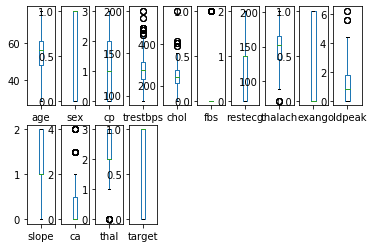

In [17]:
heart.plot(kind='box',subplots=True,layout=(2,10))

Here you can observe that there alot of outliers present in trestbps ,thal,ca,oldpeak .

# removing outliers

In [18]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(heart))
z

array([[0.26843658, 0.66150409, 0.91575542, ..., 1.20922066, 1.08985168,
        1.02669772],
       [0.15815703, 0.66150409, 0.91575542, ..., 0.73197147, 1.08985168,
        1.02669772],
       [1.71659547, 0.66150409, 0.91575542, ..., 0.73197147, 1.08985168,
        1.02669772],
       ...,
       [0.81983438, 0.66150409, 0.91575542, ..., 0.23862459, 0.52212231,
        1.02669772],
       [0.4889957 , 1.51170646, 0.91575542, ..., 0.73197147, 0.52212231,
        0.97399651],
       [0.04787747, 0.66150409, 0.91575542, ..., 0.23862459, 1.08985168,
        1.02669772]])

In [19]:
threshold=3
np.where((z>3))

(array([ 14,  52,  54,  55,  69,  83, 123, 128, 151, 158, 175, 179, 192,
        208, 242, 246, 267, 290, 294, 296, 319, 326, 329, 340, 348, 359,
        378, 393, 417, 428, 450, 464, 465, 481, 508, 521, 526, 559, 597,
        613, 641, 665, 685, 686, 688, 734, 743, 749, 831, 833, 889, 893,
        958, 970, 993, 996], dtype=int64),
 array([12, 11,  9,  9,  9, 11,  4, 11,  3,  4,  3,  4,  4, 11, 11,  3,  7,
        11,  3,  7, 12,  3, 12, 11, 11, 12,  7,  9, 11, 11,  4,  4, 11,  4,
         3, 11,  9,  7, 11,  9,  4,  4,  4, 12,  3, 12, 11, 11, 11,  9,  4,
        12,  4, 11, 11,  4], dtype=int64))

In [20]:
z[14][12]

3.7460702934952015

In [21]:
z[52][11]

3.1504128030739222

In [22]:
z[151][3]

3.4491490894633814

In [23]:
heart_new=heart[(z<3).all(axis=1)]#removing outliers

In [24]:
heart_new.shape

(969, 14)

In [25]:
heart.shape

(1025, 14)

56 rows had been removed as an outliers.

Upto now removal of outliers had been done.

# Check Distribution of Skewness:

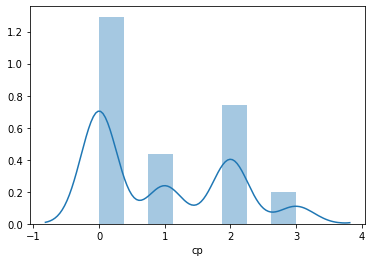

In [26]:
sns.distplot(heart['cp'])

In [27]:
collist=heart_new.columns
ncol=14
nrows=12

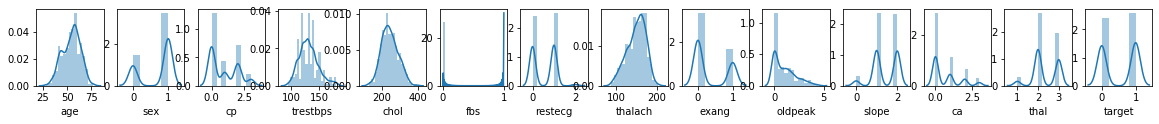

In [28]:
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(heart_new[collist[i]])

In [29]:
x=heart_new.iloc[:,:-1]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [30]:
y=heart_new.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [31]:
x.skew()

age        -0.231922
sex        -0.883378
cp          0.534378
trestbps    0.545720
chol        0.250140
fbs         2.037533
restecg     0.184201
thalach    -0.435104
exang       0.688561
oldpeak     0.937731
slope      -0.475267
ca          1.152942
thal       -0.250235
dtype: float64

fbs ,exang,oldpeak,ca has skewness and need to remove the skewness of these attributes.

In [32]:
for col in x.columns:
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [33]:
x.skew()

age        -0.231922
sex        -0.883378
cp          0.534378
trestbps    0.545720
chol        0.250140
fbs         2.037533
restecg     0.184201
thalach    -0.435104
exang       0.688561
oldpeak     0.292036
slope      -0.475267
ca          0.706179
thal       -0.250235
dtype: float64

ca and exang has still skewness .

# Building and Machine Learning Model

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [35]:
x_train.shape

(775, 13)

In [36]:
x_test.shape

(194, 13)

In [37]:
y_train.shape

(775,)

In [38]:
y_test.shape

(194,)

In [39]:
#Applying Standard Scaling to get optimized result
sc=StandardScaler()

In [40]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [41]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
lg=LogisticRegression()
knc=KNeighborsClassifier()
sgc=SGDClassifier()

************** DecisionTreeClassifier ***********


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy score 0.979381443298969
Cross-val-score= 0.9937822164948453


roc_auc_score 0.9792402354200107


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        89
           1       0.98      0.98      0.98       105

    accuracy                           0.98       194
   macro avg       0.98      0.98      0.98       194
weighted avg       0.98      0.98      0.98       194



[[ 87   2]
 [  2 103]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


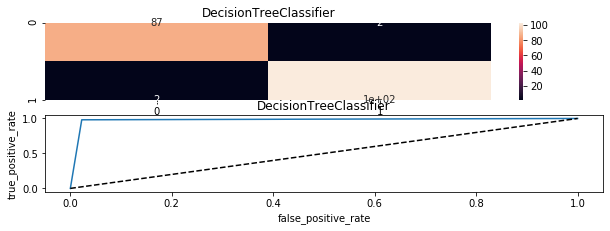

************** RandomForestClassifier ***********


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


accuracy score 0.9948453608247423
Cross-val-score= 0.991698883161512


roc_auc_score 0.9943820224719101


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.99      1.00      1.00       105

    accuracy                           0.99       194
   macro avg       1.00      0.99      0.99       194
weighted avg       0.99      0.99      0.99       194



[[ 88   1]
 [  0 105]

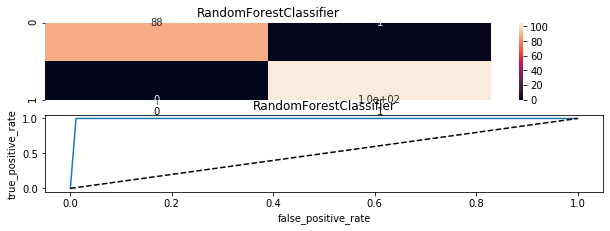

************** KNeighborsClassifier ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


accuracy score 0.8969072164948454
Cross-val-score= 0.7502469931271477


roc_auc_score 0.899625468164794


              precision    recall  f1-score   support

           0       0.86      0.93      0.89        89
           1       0.94      0.87      0.90       105

    accuracy                           0.90       194
   macro avg       0.90      0.90      0.90       194
weighted avg       0.90      0.90      0.90       194



[[83  6]
 [14 91]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


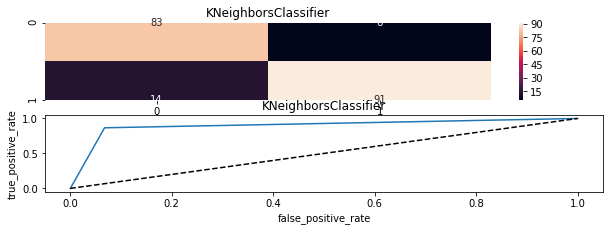

************** SGDClassifier ***********


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


accuracy score 0.8247422680412371
Cross-val-score= 0.6749548530752507


roc_auc_score 0.817549491706795


              precision    recall  f1-score   support

           0       0.87      0.73      0.79        89
           1       0.80      0.90      0.85       105

    accuracy                           0.82       194
   macro avg       0.83      0.82      0.82       194
weighted avg       0.83      0.82      0.82       194



[[65 24]
 [10 95]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


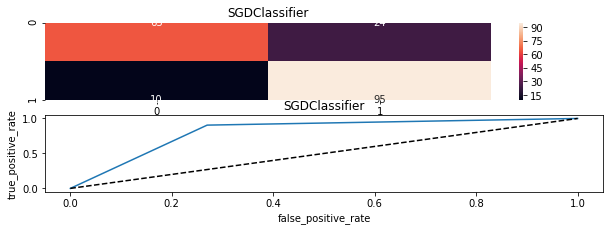

************** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


accuracy score 0.8762886597938144
Cross-val-score= 0.8657063082965145


roc_auc_score 0.8754414125200642


              precision    recall  f1-score   support

           0       0.87      0.87      0.87        89
           1       0.89      0.89      0.89       105

    accuracy                           0.88       194
   macro avg       0.88      0.88      0.88       194
weighted avg       0.88      0.88      0.88       194



[[77 12]
 [12 93]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


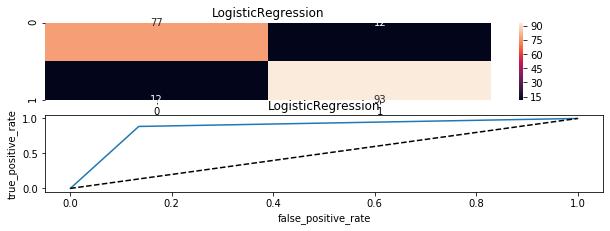

In [42]:
seed=7
#prepare models
models=[]
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))
models.append(('KNeighborsClassifier',knc))
models.append(('SGDClassifier',sgc))
models.append(('LogisticRegression',lg))



#evaluate each model in turn
Model=[]
cvs=[]
score=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred)
    print('accuracy score',acc)
    score.append(acc*100)
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv=model_selection.cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross-val-score=',cv)
    cvs.append(cv*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC'%roc_auc)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.show()

In [43]:
result=pd.DataFrame({'Model':Model,'cvs':cvs,'score':score,'rocscore':rocscore},columns=['Model','cvs','score','rocscore'])
result

,Model,cvs,score,rocscore
0,DecisionTreeClassifier,99.378222,97.938144,97.924024
1,RandomForestClassifier,99.169888,99.484536,99.438202
2,KNeighborsClassifier,75.024699,89.690722,89.962547
3,SGDClassifier,67.495485,82.474227,81.754949
4,LogisticRegression,86.570631,87.628866,87.544141


Here you can see that in RandomForestClassifier accuracy score is too good and cross-val-score is also good.

# Predicting Values

In [44]:
pred=rfc.predict(x_test)
print('predicted insurance claim:',pred)
print('actual insurance claim',y_test)

predicted insurance claim: [1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1
 1 0 1 1 1 0 0 1 0]
actual insurance claim 615     1
276     1
416     1
532     0
75      1
       ..
1019    1
802     0
822     0
34      1
32      0
Name: target, Length: 194, dtype: int64


# Saving_Model

In [45]:
heart_new=pd.DataFrame(pred)
heart_new.to_csv('rfc_heart.csv')

In [46]:
from sklearn.externals import joblib
#save the model as a pickle in a file
joblib.dump(rfc,'heart.obj')
#load the model from a file
dct_from_joblib=joblib.load('heart.obj')
#use the loaded model to make prediction
dct_from_joblib.predict(x_test)

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

Upto now building a model is done.